# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.feature_selection import mutual_info_regression



In [2]:
df=pd.read_csv('FINAL DATASET/final_merged_trends_data.csv')

In [3]:
df.shape

(2365, 167)

In [4]:
df.tail()

,date,mp3 download,YouTube,Tubidy download,Netflix,Goojara movies,Netnaija movies,Disney+,canvas prints,digital art,...,Lodging,Flight,Hotel,Guest House,Booking,FlySafair,Lift Airline,Car Rental,E-Commerce Value,E-Commerce Volume
2360,2025-06-16,55,88,17,25,8,19,66,0,0,...,0,40,71,24,19,9,0,17,28205.582890,629
2361,2025-06-17,45,87,14,19,6,18,56,0,0,...,0,38,54,26,29,13,0,21,29144.454690,624
2362,2025-06-18,45,84,13,16,6,21,52,0,0,...,0,29,56,24,27,10,0,14,40365.723218,1077
2363,2025-06-19,46,85,15,17,6,24,51,0,0,...,0,38,57,24,23,8,0,18,21466.979056,484
2364,2025-06-20,55,77,16,20,7,21,68,0,0,...,0,34,60,21,20,8,0,18,13976.384070,295


In [5]:
df.head()

,date,mp3 download,YouTube,Tubidy download,Netflix,Goojara movies,Netnaija movies,Disney+,canvas prints,digital art,...,Lodging,Flight,Hotel,Guest House,Booking,FlySafair,Lift Airline,Car Rental,E-Commerce Value,E-Commerce Volume
0,2018-12-30,80,59,6,18,0,0,39,0,0,...,0,63,100,37,22,7,0,9,48229.459312,456
1,2018-12-31,91,73,8,15,0,0,21,0,0,...,0,57,98,36,23,8,0,12,68629.143788,559
2,2019-01-01,76,59,6,24,0,0,36,0,0,...,0,73,92,27,31,8,0,8,52162.890120,471
3,2019-01-02,65,57,5,17,0,0,32,0,0,...,0,64,89,28,27,9,0,8,66311.844346,736
4,2019-01-03,58,56,5,14,0,0,23,0,0,...,0,56,94,25,28,8,0,11,95740.128026,682


In [6]:
df.head()

,date,mp3 download,YouTube,Tubidy download,Netflix,Goojara movies,Netnaija movies,Disney+,canvas prints,digital art,...,Lodging,Flight,Hotel,Guest House,Booking,FlySafair,Lift Airline,Car Rental,E-Commerce Value,E-Commerce Volume
0,2018-12-30,80,59,6,18,0,0,39,0,0,...,0,63,100,37,22,7,0,9,48229.459312,456
1,2018-12-31,91,73,8,15,0,0,21,0,0,...,0,57,98,36,23,8,0,12,68629.143788,559
2,2019-01-01,76,59,6,24,0,0,36,0,0,...,0,73,92,27,31,8,0,8,52162.890120,471
3,2019-01-02,65,57,5,17,0,0,32,0,0,...,0,64,89,28,27,9,0,8,66311.844346,736
4,2019-01-03,58,56,5,14,0,0,23,0,0,...,0,56,94,25,28,8,0,11,95740.128026,682


In [7]:
df['date']

0       2018-12-30
1       2018-12-31
2       2019-01-01
3       2019-01-02
4       2019-01-03
           ...    
2360    2025-06-16
2361    2025-06-17
2362    2025-06-18
2363    2025-06-19
2364    2025-06-20
Name: date, Length: 2365, dtype: object

In [8]:
df.columns

Index(['date', 'mp3 download', 'YouTube', 'Tubidy download', 'Netflix',
       'Goojara movies', 'Netnaija movies', 'Disney+', 'canvas prints',
       'digital art',
       ...
       'Lodging', 'Flight', 'Hotel', 'Guest House', 'Booking', 'FlySafair',
       'Lift Airline', 'Car Rental', 'E-Commerce Value', 'E-Commerce Volume'],
      dtype='object', length=167)

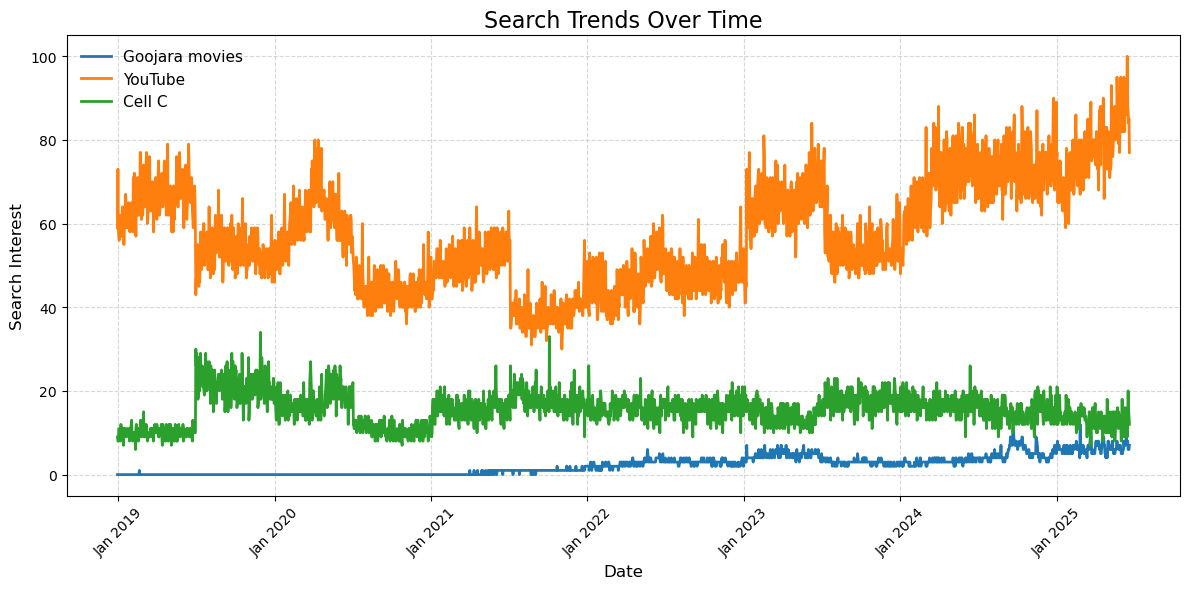

In [9]:
# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

plt.figure(figsize=(12, 6))

plt.plot(df['date'], df['Goojara movies'], linewidth=2, label='Goojara movies')
plt.plot(df['date'], df['YouTube'], linewidth=2, label='YouTube')
plt.plot(df['date'], df['Cell C'], linewidth=2, label='Cell C')

# Styling
plt.title("Search Trends Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Search Interest", fontsize=12)

# Format x-axis to avoid clutter
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically space out dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jul 2024', etc.

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=False, fontsize=11)
plt.tight_layout()

plt.show()

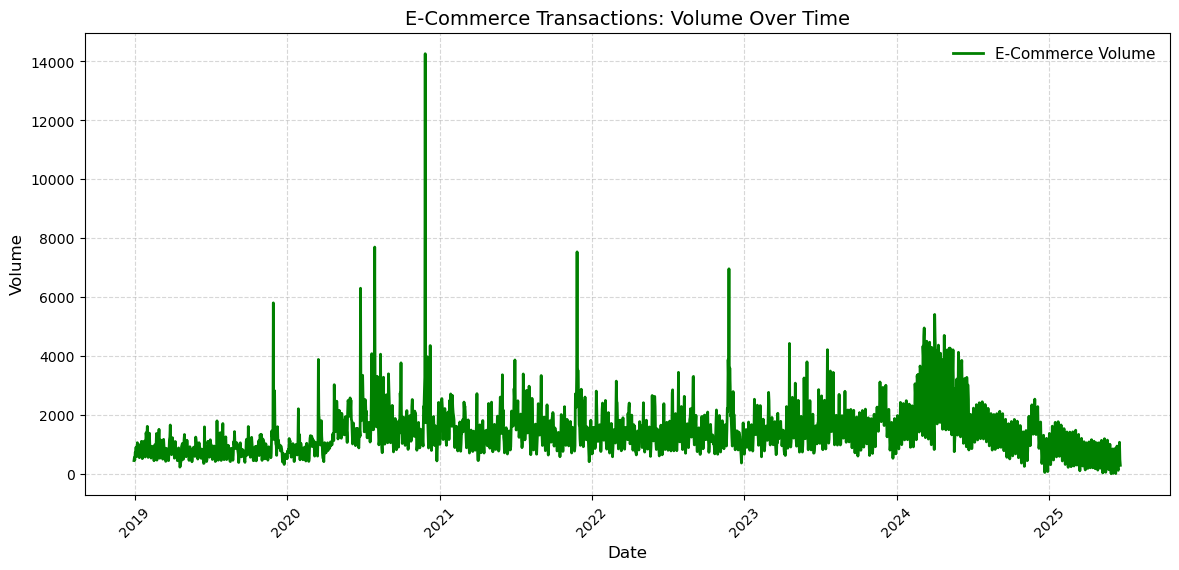

In [10]:

plt.figure(figsize=(14, 6))
#  E-Commerce Transactions: Volume
plt.plot(df['date'], df['E-Commerce Volume'], linewidth=2, color='green', label='E-Commerce Volume')
plt.title("E-Commerce Transactions: Volume Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=False, fontsize=11)

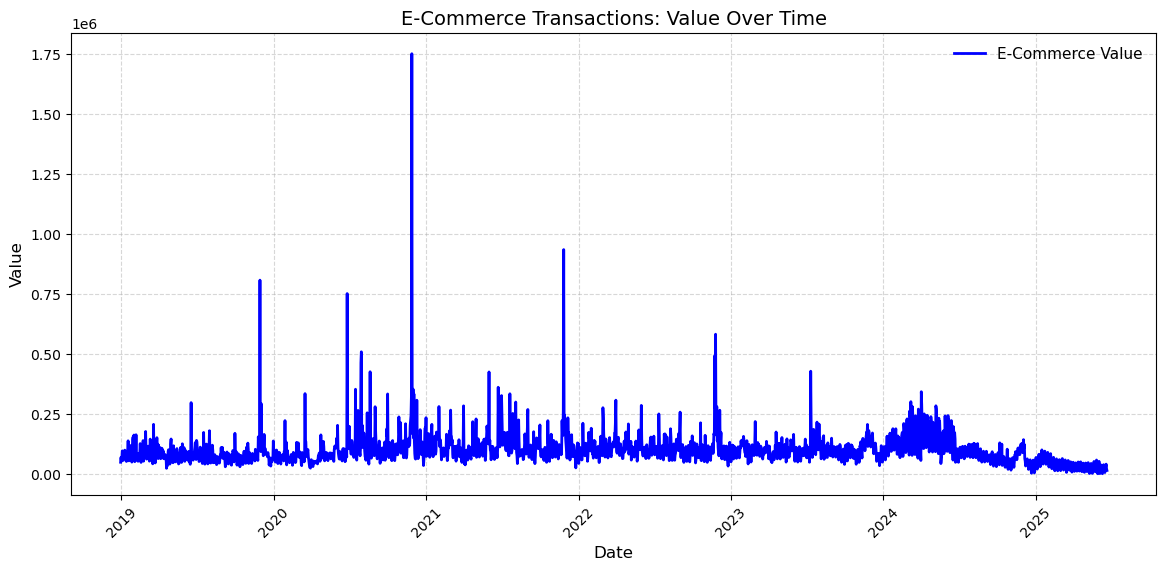

In [11]:

#  E-Commerce Transactions: Value
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['E-Commerce Value'], linewidth=2, color='blue', label='E-Commerce Value')
plt.title("E-Commerce Transactions: Value Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=False, fontsize=11)


In [12]:
# from df data frame select only the columns that are in the google_trends_cols list + date column + ecommerce value column + ecommerce volume column 

google_trends_cols = [
    'Netflix','Disney+','canvas prints','digital art','We Buy Cars','AutoTrader',
    'Cars for Sale','Cars','Clicks','Dischem','Avon','CeraVe','Perfume','Hair',
    'Makeup','Cosmetics','Beauty Salon','Exclusive Books','textbook','ebook',
    'Amazon books','novel','Hollywoodbets','ShopRite','Steers','Betway',
    'Uber Eats','Bolt','60 sixty','DStv Stream','Mr Price','Makro','computer',
    'laptop','monitor stand','KFC','beverage','McDonald\'s','Checkers',
    'Woolworths','Pick n Pay','Nandos','Burger King','Debonairs Pizza',
    'Grocery delivery','PS5 games','Powerball','Xbox games','video games',
    'Genshin Impact','Lotto','Game','Betfred','Medicine','Tablets',
    'Pharmaceutical drugs','Insurance plan','Vitamins online','Immune booster',
    'Lottostar (Pty) Ltd','Daily Lotto','DIY kits','art supplies','Takealot.com',
    'Mr Price Home','Decofurn','furniture','Makro.1','Builders','paints',
    'Defy Appliances','Pep Home','plant','iPhone','Vodacom','MTN','Telkom',
    'Cell C','magazines','news subscription','Online Marketplace','Dog Food',
    'Puppies for Sale','Pet shop','Property24','Private Property','Remax Hub',
    'Houses for Sale','Flats to rent','Room to rent','The Parks Lifestyle Apartments',
    'Eazi Real Estate','Property sales','Real Estate','Black friday','Sneakers',
    'Online Shopping','Shein','Adidas','Puma','Nike','sportscene','clothing',
    'Gambling','Tickets','Arsenal Store','Lodging','Flight','Hotel','Guest House',
    'Booking','FlySafair','Lift Airline','Car Rental.'
]



final_columns = google_trends_cols + ['date','E-Commerce Value', 'E-Commerce Volume']


df_final = df.loc[:, df.columns.intersection(final_columns)]

In [13]:
df_final.shape

(2365, 115)

In [14]:
df_final.head()

,date,Netflix,Disney+,canvas prints,digital art,We Buy Cars,AutoTrader,Cars for Sale,Cars,Clicks,...,Arsenal Store,Lodging,Flight,Hotel,Guest House,Booking,FlySafair,Lift Airline,E-Commerce Value,E-Commerce Volume
0,2018-12-30,18,39,0,0,7,17,25,70,54,...,0,0,63,100,37,22,7,0,48229.459312,456
1,2018-12-31,15,21,0,0,5,15,20,62,45,...,0,0,57,98,36,23,8,0,68629.143788,559
2,2019-01-01,24,36,0,0,9,20,27,72,38,...,0,0,73,92,27,31,8,0,52162.890120,471
3,2019-01-02,17,32,0,0,11,22,30,79,67,...,0,0,64,89,28,27,9,0,66311.844346,736
4,2019-01-03,14,23,0,0,13,23,27,77,55,...,0,0,56,94,25,28,8,0,95740.128026,682


# value and volume data frame 

In [15]:
# Drop target columns from the feature set
X = df_final.drop(columns=['E-Commerce Value', 'E-Commerce Volume'])

# Keep the target columns separately
y_value = df_final['E-Commerce Value']
y_volume = df_final['E-Commerce Volume']

In [16]:
# Value DataFrame
df_value = X.copy()
df_value['E-Commerce Value'] = y_value

# Volume DataFrame
df_volume = X.copy()
df_volume['E-Commerce Volume'] = y_volume


In [17]:
print ("Value DataFrame shape:", df_value.shape)
print ("Volume DataFrame shape:", df_volume.shape)

Value DataFrame shape: (2365, 114)
Volume DataFrame shape: (2365, 114)


In [18]:
df_value.head()

,date,Netflix,Disney+,canvas prints,digital art,We Buy Cars,AutoTrader,Cars for Sale,Cars,Clicks,...,Tickets,Arsenal Store,Lodging,Flight,Hotel,Guest House,Booking,FlySafair,Lift Airline,E-Commerce Value
0,2018-12-30,18,39,0,0,7,17,25,70,54,...,19,0,0,63,100,37,22,7,0,48229.459312
1,2018-12-31,15,21,0,0,5,15,20,62,45,...,24,0,0,57,98,36,23,8,0,68629.143788
2,2019-01-01,24,36,0,0,9,20,27,72,38,...,16,0,0,73,92,27,31,8,0,52162.890120
3,2019-01-02,17,32,0,0,11,22,30,79,67,...,18,0,0,64,89,28,27,9,0,66311.844346
4,2019-01-03,14,23,0,0,13,23,27,77,55,...,18,0,0,56,94,25,28,8,0,95740.128026


In [19]:
df_volume.head()

,date,Netflix,Disney+,canvas prints,digital art,We Buy Cars,AutoTrader,Cars for Sale,Cars,Clicks,...,Tickets,Arsenal Store,Lodging,Flight,Hotel,Guest House,Booking,FlySafair,Lift Airline,E-Commerce Volume
0,2018-12-30,18,39,0,0,7,17,25,70,54,...,19,0,0,63,100,37,22,7,0,456
1,2018-12-31,15,21,0,0,5,15,20,62,45,...,24,0,0,57,98,36,23,8,0,559
2,2019-01-01,24,36,0,0,9,20,27,72,38,...,16,0,0,73,92,27,31,8,0,471
3,2019-01-02,17,32,0,0,11,22,30,79,67,...,18,0,0,64,89,28,27,9,0,736
4,2019-01-03,14,23,0,0,13,23,27,77,55,...,18,0,0,56,94,25,28,8,0,682


In [20]:
import tensorflow as tf
tf.config.set_visible_devices([],'GPU')

# value feature selection

1.  Mutual Information Feature Selection
2. correlation

In [21]:
df_value.columns

Index(['date', 'Netflix', 'Disney+', 'canvas prints', 'digital art',
       'We Buy Cars', 'AutoTrader', 'Cars for Sale', 'Cars', 'Clicks',
       ...
       'Tickets', 'Arsenal Store', 'Lodging', 'Flight', 'Hotel', 'Guest House',
       'Booking', 'FlySafair', 'Lift Airline', 'E-Commerce Value'],
      dtype='object', length=114)

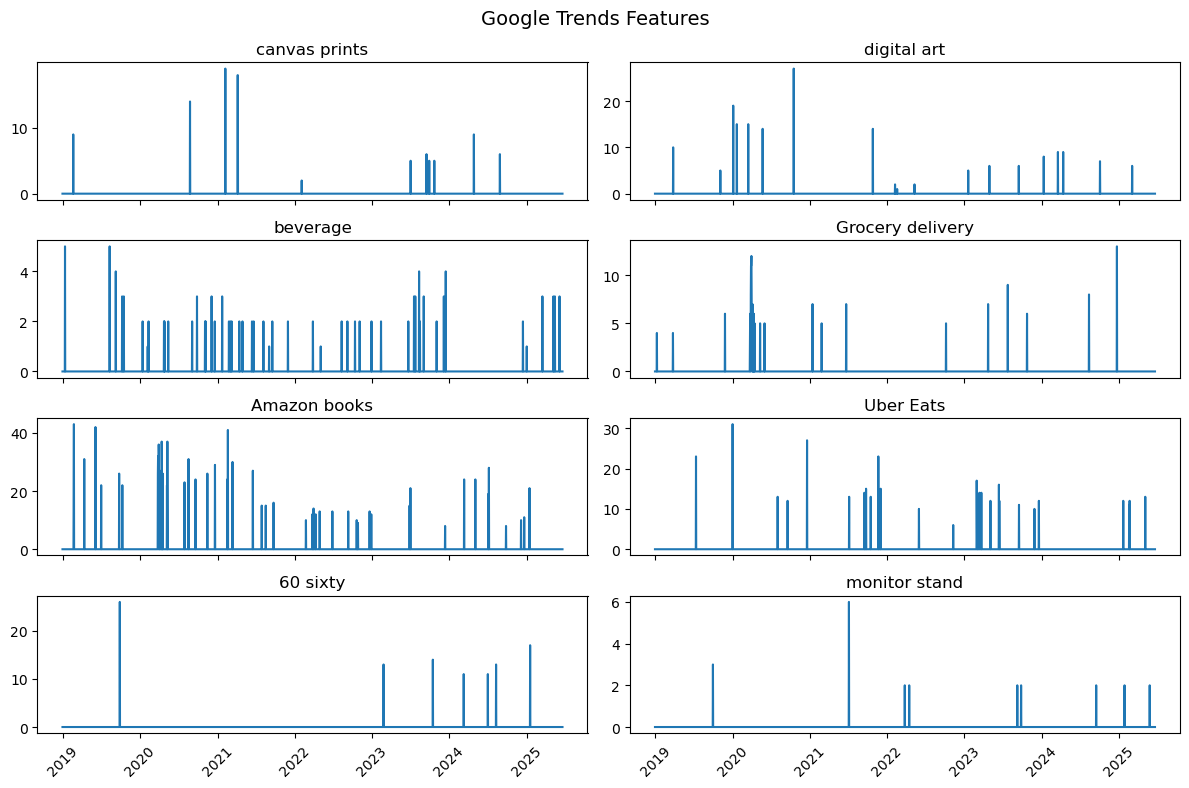

In [22]:
cols_to_plot = ['canvas prints', 'digital art','beverage','Grocery delivery',
                'Amazon books', 'Uber Eats', '60 sixty', 'monitor stand']

n_cols = 2
n_rows = int(np.ceil(len(cols_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8), sharex=True)
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].plot(df_value['date'], df_value[col], label=col, color="tab:blue")
    axes[i].set_title(col)
    axes[i].tick_params(axis="x", rotation=45)

# Remove any empty subplot spaces
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Google Trends Features", fontsize=14)
plt.tight_layout()
plt.show()


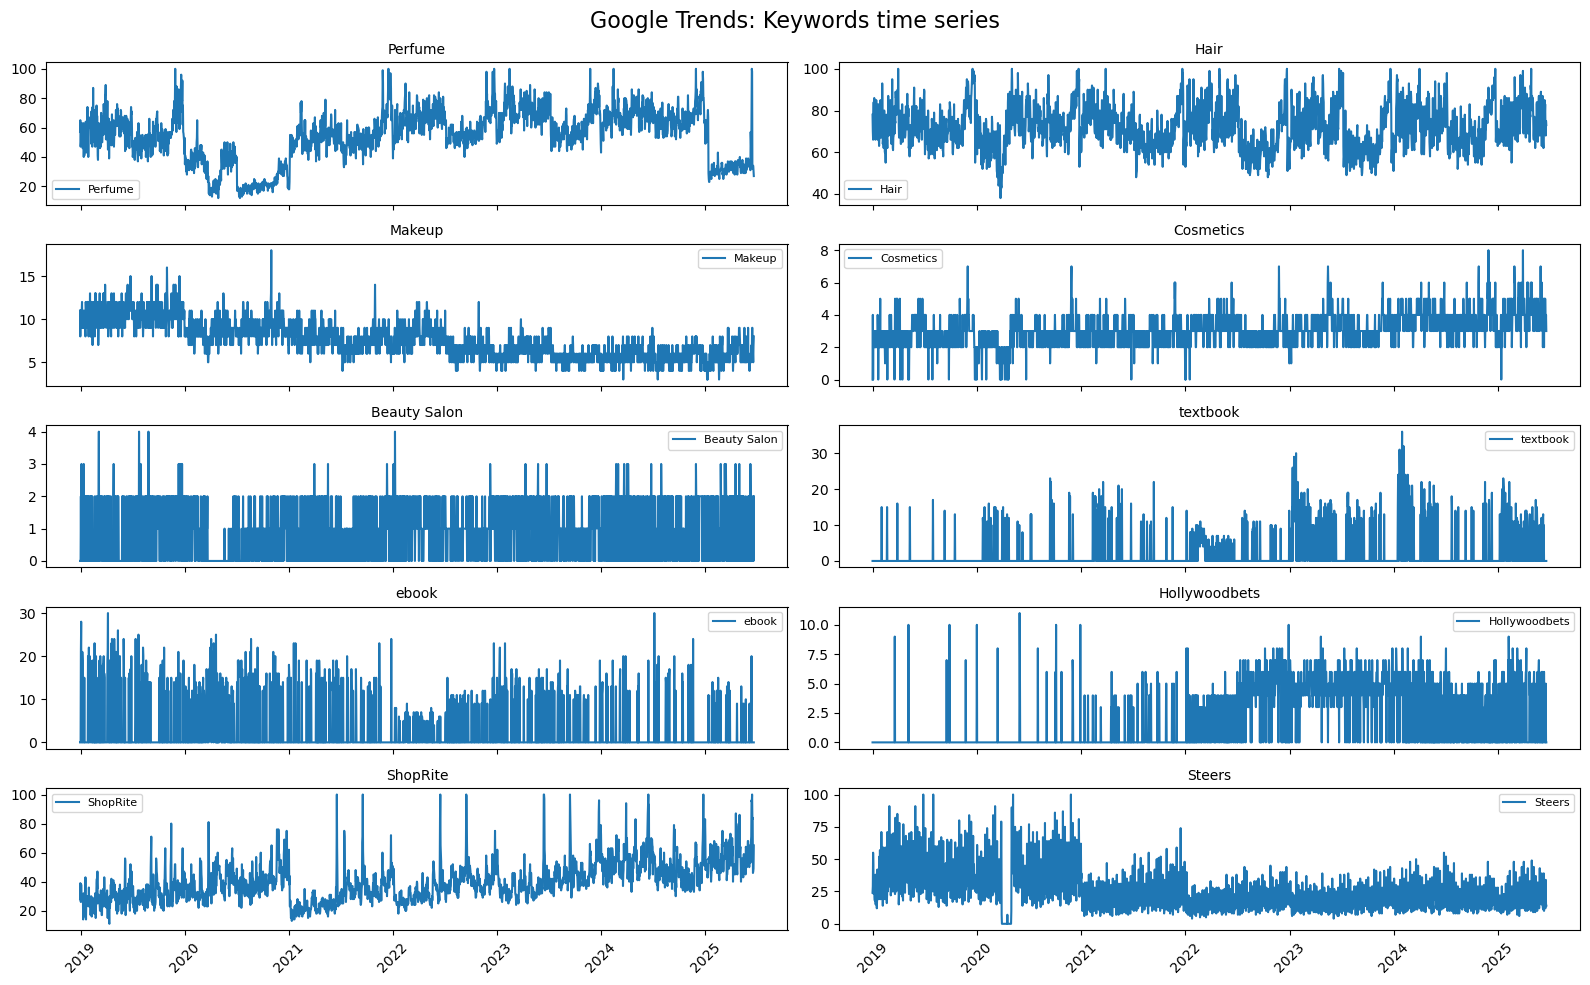

In [23]:
# features to plot in one list
cols_to_plot = ['Perfume','Hair','Makeup','Cosmetics','Beauty Salon',
               'textbook','ebook','Hollywoodbets','ShopRite','Steers',]

# Grid size 
n_cols = 2
n_rows = int(np.ceil(len(cols_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10), sharex=True)
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].plot(df_value['date'], df_value[col], label=col)
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].legend(fontsize=8)

# Remove unused subplot spaces if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Google Trends: Keywords time series", fontsize=16)
plt.tight_layout()
plt.show()


In [24]:
df_value.head()

,date,Netflix,Disney+,canvas prints,digital art,We Buy Cars,AutoTrader,Cars for Sale,Cars,Clicks,...,Tickets,Arsenal Store,Lodging,Flight,Hotel,Guest House,Booking,FlySafair,Lift Airline,E-Commerce Value
0,2018-12-30,18,39,0,0,7,17,25,70,54,...,19,0,0,63,100,37,22,7,0,48229.459312
1,2018-12-31,15,21,0,0,5,15,20,62,45,...,24,0,0,57,98,36,23,8,0,68629.143788
2,2019-01-01,24,36,0,0,9,20,27,72,38,...,16,0,0,73,92,27,31,8,0,52162.890120
3,2019-01-02,17,32,0,0,11,22,30,79,67,...,18,0,0,64,89,28,27,9,0,66311.844346
4,2019-01-03,14,23,0,0,13,23,27,77,55,...,18,0,0,56,94,25,28,8,0,95740.128026


In [25]:
df_value.columns

Index(['date', 'Netflix', 'Disney+', 'canvas prints', 'digital art',
       'We Buy Cars', 'AutoTrader', 'Cars for Sale', 'Cars', 'Clicks',
       ...
       'Tickets', 'Arsenal Store', 'Lodging', 'Flight', 'Hotel', 'Guest House',
       'Booking', 'FlySafair', 'Lift Airline', 'E-Commerce Value'],
      dtype='object', length=114)

In [26]:
# Convert 'date' column to datetime 
df_value['date'] = pd.to_datetime(df_value['date'])

# Set 'date' as index
df_value.set_index('date', inplace=True)


In [27]:
df_value.head()

,Netflix,Disney+,canvas prints,digital art,We Buy Cars,AutoTrader,Cars for Sale,Cars,Clicks,Dischem,...,Tickets,Arsenal Store,Lodging,Flight,Hotel,Guest House,Booking,FlySafair,Lift Airline,E-Commerce Value
date,,,,,,,,,,,,,,,,,,,,,
2018-12-30,18,39,0,0,7,17,25,70,54,36,...,19,0,0,63,100,37,22,7,0,48229.459312
2018-12-31,15,21,0,0,5,15,20,62,45,36,...,24,0,0,57,98,36,23,8,0,68629.143788
2019-01-01,24,36,0,0,9,20,27,72,38,23,...,16,0,0,73,92,27,31,8,0,52162.890120
2019-01-02,17,32,0,0,11,22,30,79,67,33,...,18,0,0,64,89,28,27,9,0,66311.844346
2019-01-03,14,23,0,0,13,23,27,77,55,42,...,18,0,0,56,94,25,28,8,0,95740.128026


In [28]:
# Separate features and target
X = df_value.drop(columns=['E-Commerce Value'])
y = df_value['E-Commerce Value']

# Mutual Information feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Initialize selector 
selector = SelectKBest(score_func=mutual_info_regression, k='all')

# Fit on your features
selector.fit(X, y)


SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x00000245C7FC9C60>)

In [29]:
# Get scores
mi_scores = selector.scores_
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})



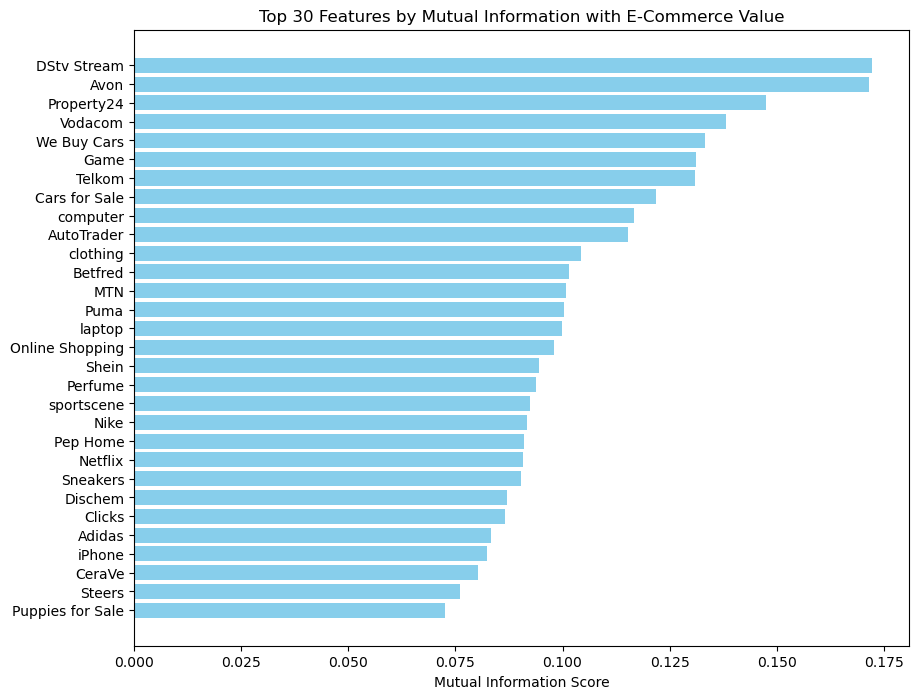

In [30]:
mi_df = mi_df.sort_values(by='MI Score', ascending=False).head(30)

# Plot
plt.figure(figsize=(10,8))
plt.barh(mi_df['Feature'], mi_df['MI Score'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 30 Features by Mutual Information with E-Commerce Value")
plt.xlabel("Mutual Information Score")
plt.show()


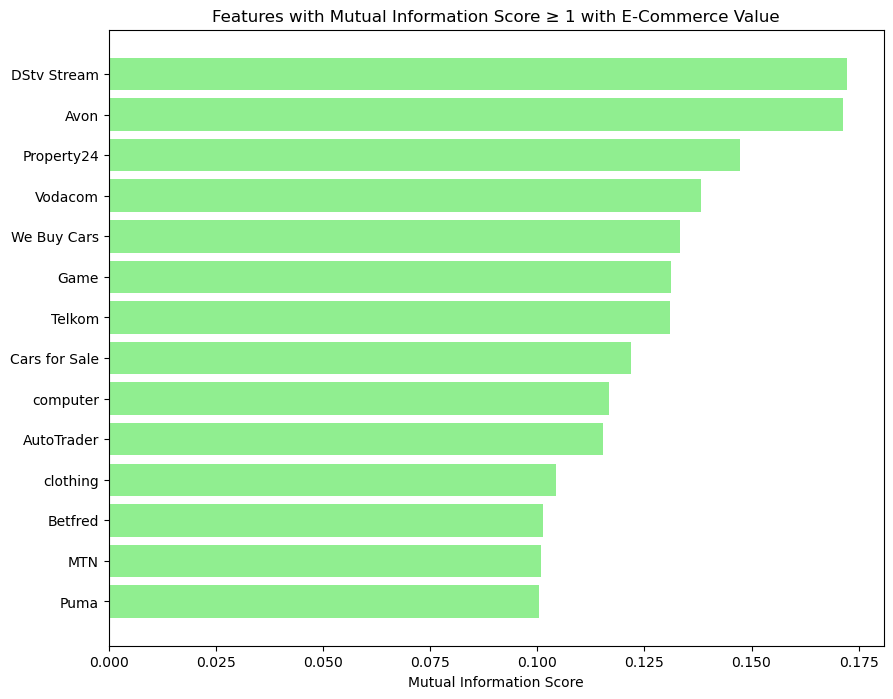

In [31]:
# Filter features with MI Score >= 0.1
mi_df_filtered = mi_df[mi_df['MI Score'] >= 0.1].sort_values(by='MI Score', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(mi_df_filtered['Feature'], mi_df_filtered['MI Score'], color='lightgreen')
plt.gca().invert_yaxis()
plt.title("Features with Mutual Information Score ≥ 1 with E-Commerce Value")
plt.xlabel("Mutual Information Score")
plt.show()

In [32]:
print("Features with MI Score >= 0.1:")

# Get the list of feature names
print (mi_df_filtered['Feature'].tolist())

Features with MI Score >= 0.1:
['DStv Stream', 'Avon', 'Property24', 'Vodacom', 'We Buy Cars', 'Game', 'Telkom', 'Cars for Sale', 'computer', 'AutoTrader', 'clothing', 'Betfred', 'MTN', 'Puma']


In [33]:
# subset your X data to keep only these features
X_selected = X[mi_df_filtered['Feature'].tolist()]
X_selected.head()

,DStv Stream,Avon,Property24,Vodacom,We Buy Cars,Game,Telkom,Cars for Sale,computer,AutoTrader,clothing,Betfred,MTN,Puma
date,,,,,,,,,,,,,,
2018-12-30,0,34,23,46,7,11,61,25,13,17,63,0,29,19
2018-12-31,0,29,22,58,5,13,72,20,11,15,53,0,32,16
2019-01-01,0,39,30,54,9,13,58,27,12,20,50,0,29,12
2019-01-02,0,42,31,67,11,13,81,30,14,22,58,0,42,9
2019-01-03,0,45,34,65,13,12,71,27,17,23,53,0,35,10


In [34]:
X_selected.shape

(2365, 14)

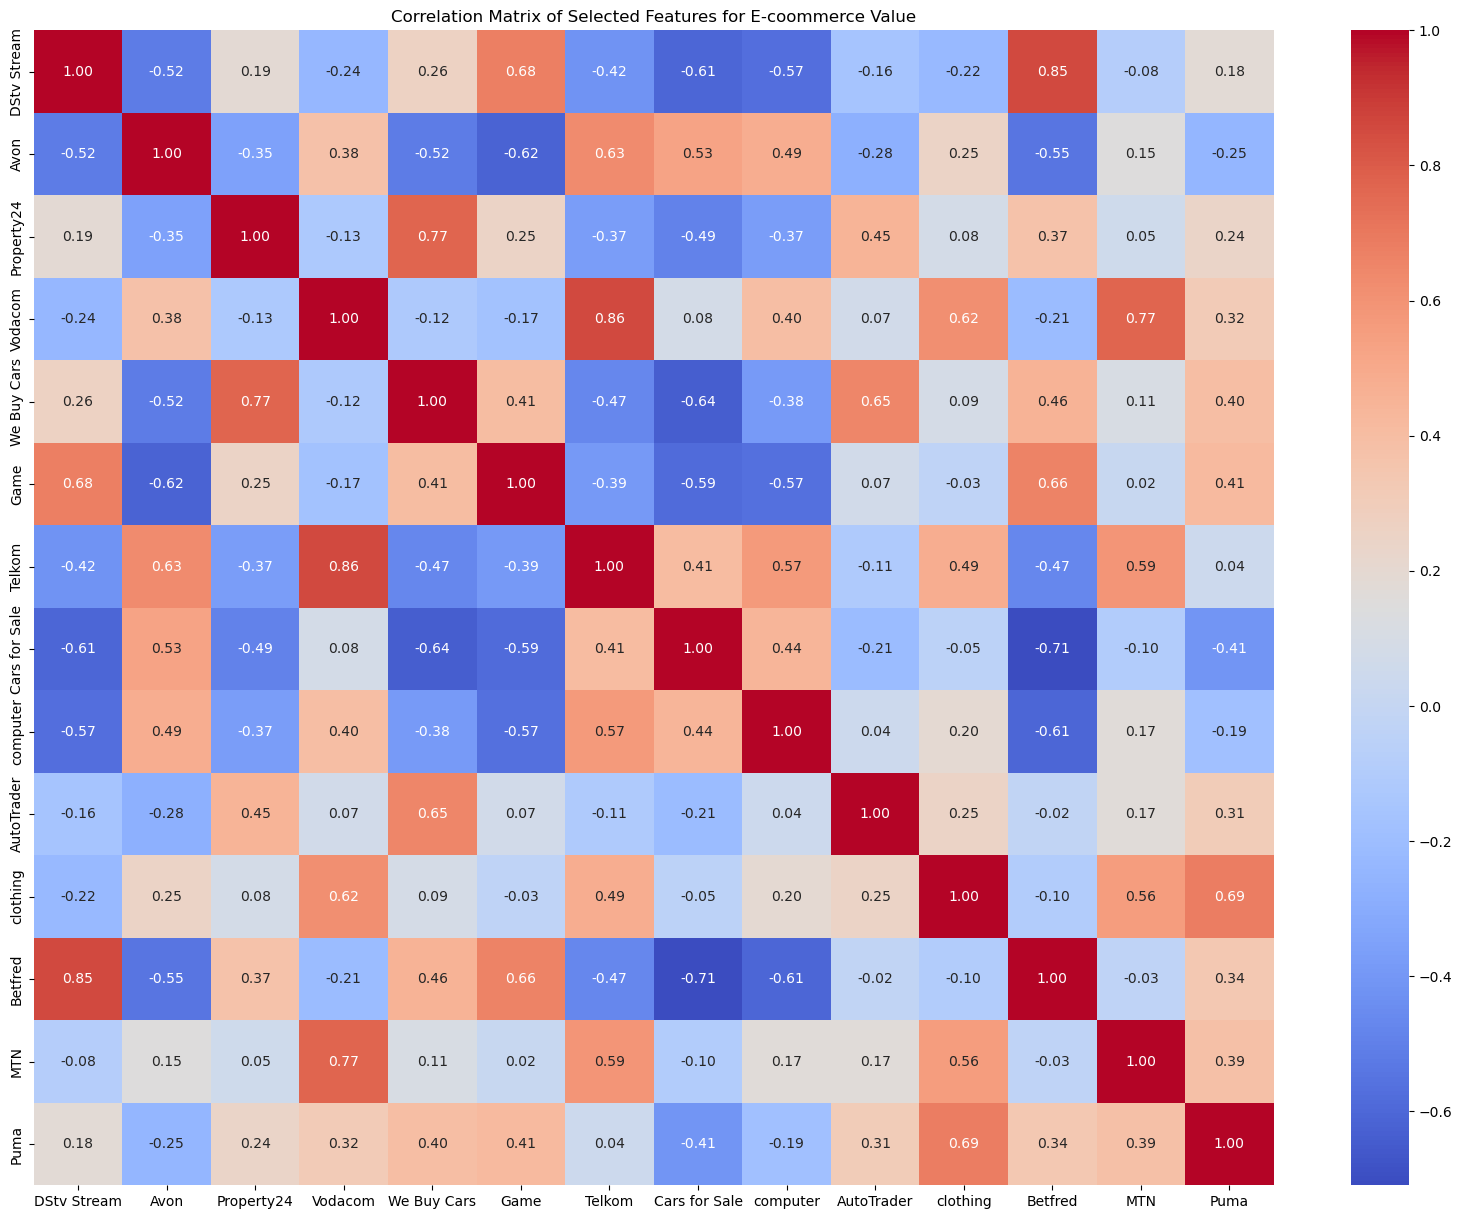

In [35]:
# Compute correlation matrix
corr_matrix = X_selected.corr()

# Plot the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Selected Features for E-coommerce Value")
plt.show()

In [36]:
# find highly correlated pairs 
threshold = 0.8
high_corr = np.where(corr_matrix >= threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y])
                   for x, y in zip(*high_corr) if x != y and x < y]

print(f"Highly correlated feature pairs (>= {threshold}):")
for f1, f2, corr_val in high_corr_pairs:
    print(f"{f1} - {f2}: {corr_val:.2f}")

Highly correlated feature pairs (>= 0.8):
DStv Stream - Betfred: 0.85
Vodacom - Telkom: 0.86


In [37]:
# Compute correlation of each feature with target y
feature_target_corr = df.corrwith(y).to_dict()

# Select one feature per pair based on higher correlation with y
selected_features = []
for f1, f2, corr_val in high_corr_pairs:
    score1 = abs(feature_target_corr.get(f1, 0))
    score2 = abs(feature_target_corr.get(f2, 0))
    # Pick the feature more strongly correlated with y
    selected = f1 if score1 >= score2 else f2
    selected_features.append(selected)

# Remove duplicates
selected_features = list(set(selected_features))

print("Selected features most correlated to target 'value':")
print(selected_features)

Selected features most correlated to target 'value':
['Betfred', 'Telkom']


In [38]:
# Initialize features to drop
features_to_drop = []

for f1, f2, corr_val in high_corr_pairs:
    # Drop the feature that is not in selected_features
    if f1 in selected_features and f2 not in selected_features:
        features_to_drop.append(f2)
    elif f2 in selected_features and f1 not in selected_features:
        features_to_drop.append(f1)
    else:
        # If neither is in selected_features, drop one arbitrarily 
        if f2 in X_selected.columns:
            features_to_drop.append(f2)

# Remove duplicates
features_to_drop = list(set(features_to_drop))

In [39]:
features_to_drop

['DStv Stream', 'Vodacom']

In [40]:

# Collect all features that appear in any correlated pair
paired_features = set([f for pair in high_corr_pairs for f in pair[:2]])

# Identify features to drop: paired features that are NOT selected
features_to_drop = list(paired_features - set(selected_features))

#  Keep all other unpaired features
X_final = X_selected.drop(columns=features_to_drop, errors='ignore')

print("Dropped features from pairs:", features_to_drop)
print("Final features after correlation filtering:", X_final.columns.tolist())

Dropped features from pairs: ['DStv Stream', 'Vodacom']
Final features after correlation filtering: ['Avon', 'Property24', 'We Buy Cars', 'Game', 'Telkom', 'Cars for Sale', 'computer', 'AutoTrader', 'clothing', 'Betfred', 'MTN', 'Puma']


In [41]:
X_final.shape

(2365, 12)

In [42]:
X_final.head()

,Avon,Property24,We Buy Cars,Game,Telkom,Cars for Sale,computer,AutoTrader,clothing,Betfred,MTN,Puma
date,,,,,,,,,,,,
2018-12-30,34,23,7,11,61,25,13,17,63,0,29,19
2018-12-31,29,22,5,13,72,20,11,15,53,0,32,16
2019-01-01,39,30,9,13,58,27,12,20,50,0,29,12
2019-01-02,42,31,11,13,81,30,14,22,58,0,42,9
2019-01-03,45,34,13,12,71,27,17,23,53,0,35,10


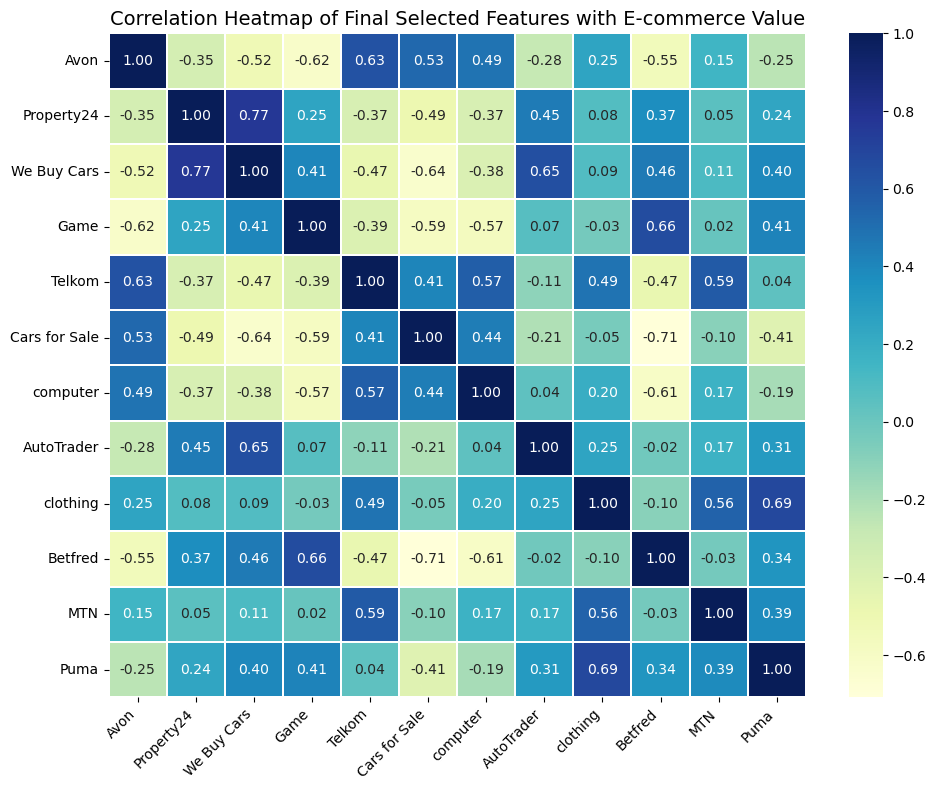

In [43]:
# Compute correlation matrix
corr_final = X_final.corr()

# --- Plot Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_final, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.3)
plt.title("Correlation Heatmap of Final Selected Features with E-commerce Value", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [63]:
X_final.shape

(2365, 12)

In [44]:
# Save to CSV 
X_final.to_csv("selected_google_trends_value.csv")

print("Saved selected features  to 'selected_google_trends_value.csv'")
X_final.head()


Saved selected features  to 'selected_google_trends_value.csv'


,Avon,Property24,We Buy Cars,Game,Telkom,Cars for Sale,computer,AutoTrader,clothing,Betfred,MTN,Puma
date,,,,,,,,,,,,
2018-12-30,34,23,7,11,61,25,13,17,63,0,29,19
2018-12-31,29,22,5,13,72,20,11,15,53,0,32,16
2019-01-01,39,30,9,13,58,27,12,20,50,0,29,12
2019-01-02,42,31,11,13,81,30,14,22,58,0,42,9
2019-01-03,45,34,13,12,71,27,17,23,53,0,35,10


# Volume Feature Selector

In [45]:
df_volume.head()

,date,Netflix,Disney+,canvas prints,digital art,We Buy Cars,AutoTrader,Cars for Sale,Cars,Clicks,...,Tickets,Arsenal Store,Lodging,Flight,Hotel,Guest House,Booking,FlySafair,Lift Airline,E-Commerce Volume
0,2018-12-30,18,39,0,0,7,17,25,70,54,...,19,0,0,63,100,37,22,7,0,456
1,2018-12-31,15,21,0,0,5,15,20,62,45,...,24,0,0,57,98,36,23,8,0,559
2,2019-01-01,24,36,0,0,9,20,27,72,38,...,16,0,0,73,92,27,31,8,0,471
3,2019-01-02,17,32,0,0,11,22,30,79,67,...,18,0,0,64,89,28,27,9,0,736
4,2019-01-03,14,23,0,0,13,23,27,77,55,...,18,0,0,56,94,25,28,8,0,682


In [46]:
df_volume.shape

(2365, 114)

In [47]:
df_volume['date'] = pd.to_datetime(df_volume['date'])  
df_volume.set_index('date', inplace=True)

In [48]:
target_col = 'E-Commerce Volume'
X = df_volume.drop(columns=[target_col])
y = df_volume[target_col]


In [49]:
# Compute MI
mi_scores = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi_scores})
# sorting the scores
mi_df= mi_df.sort_values(by="MI", ascending=False)


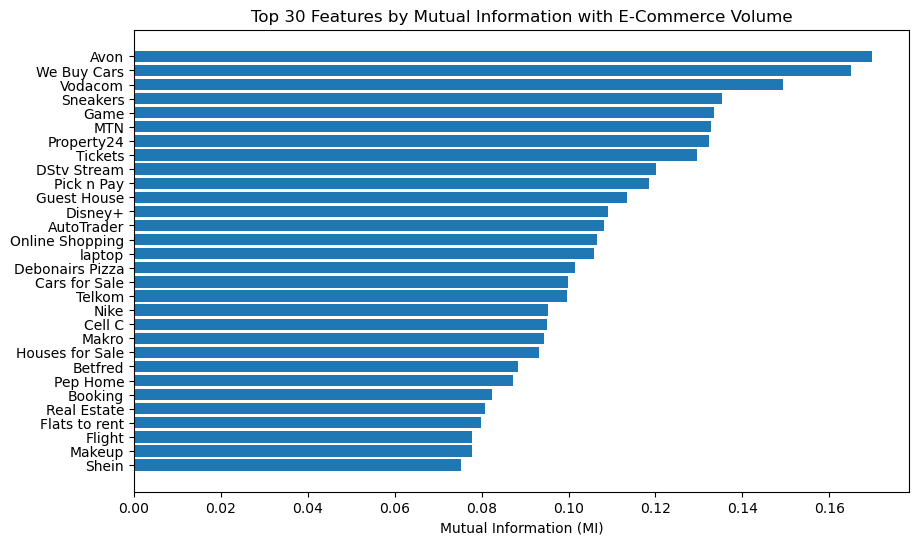

In [50]:
# Plot  MI scores
top_n = 30
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'].head(top_n), mi_df['MI'].head(top_n))
plt.gca().invert_yaxis() 
plt.xlabel("Mutual Information (MI)")
plt.title(f"Top {top_n} Features by Mutual Information with E-Commerce Volume")
plt.show()

In [51]:
# Filter features with MI >= 0.1
mi_threshold = 0.1
important_features = mi_df[mi_df['MI'] >= mi_threshold]
print ("total features with >= 0.1 MI score:",len(important_features))
# If you just need the names
selected_features = important_features['Feature'].tolist()
print("\nSelected feature names:", selected_features)

total features with >= 0.1 MI score: 16

Selected feature names: ['Avon', 'We Buy Cars', 'Vodacom', 'Sneakers', 'Game', 'MTN', 'Property24', 'Tickets', 'DStv Stream', 'Pick n Pay', 'Guest House', 'Disney+', 'AutoTrader', 'Online Shopping', 'laptop', 'Debonairs Pizza']


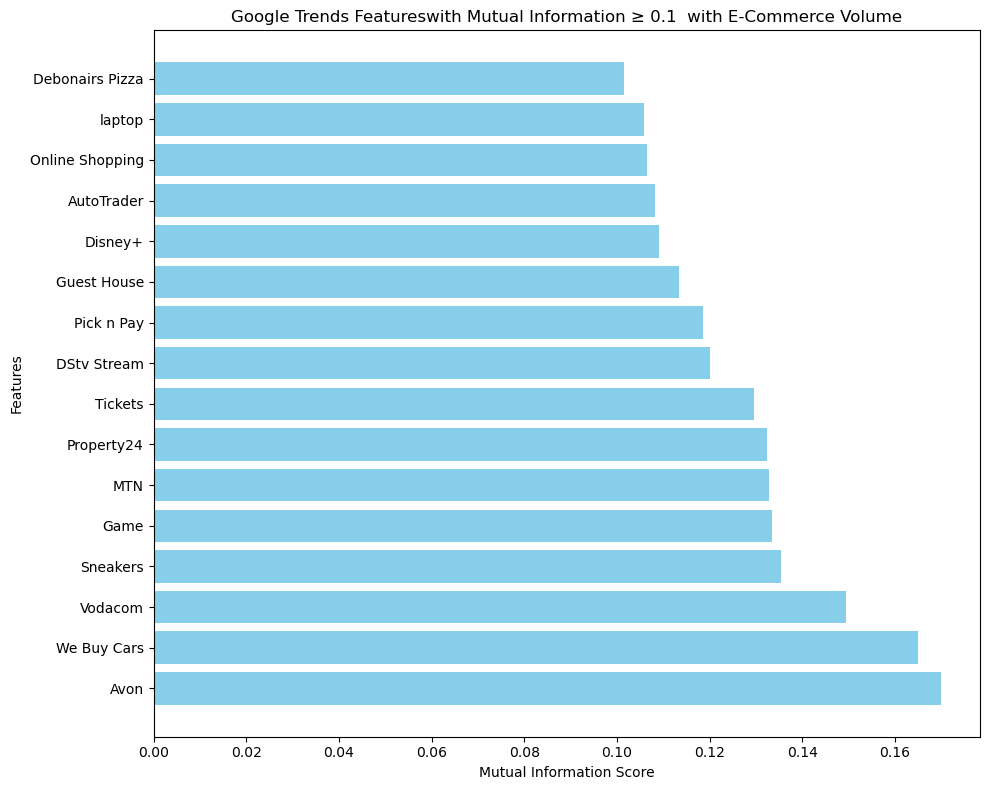

In [52]:
# --- Sort features by MI score for plotting ---
important_features = important_features.sort_values(by='MI', ascending=True)

# --- Plot horizontal bar chart ---
plt.figure(figsize=(10, 8))
plt.barh(important_features['Feature'], important_features['MI'], color='skyblue')
plt.title("Google Trends Featureswith Mutual Information ≥ 0.1  with E-Commerce Volume")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # highest MI at the top
plt.tight_layout()
plt.show()

In [53]:
# Subset X to keep only the important features
Volume_selected = X[selected_features]

print("Shape before:", X.shape)
print("Shape after:", Volume_selected.shape)

Shape before: (2365, 112)
Shape after: (2365, 16)


In [54]:
Volume_selected.columns

Index(['Avon', 'We Buy Cars', 'Vodacom', 'Sneakers', 'Game', 'MTN',
       'Property24', 'Tickets', 'DStv Stream', 'Pick n Pay', 'Guest House',
       'Disney+', 'AutoTrader', 'Online Shopping', 'laptop',
       'Debonairs Pizza'],
      dtype='object')

In [55]:
Volume_selected.head()

,Avon,We Buy Cars,Vodacom,Sneakers,Game,MTN,Property24,Tickets,DStv Stream,Pick n Pay,Guest House,Disney+,AutoTrader,Online Shopping,laptop,Debonairs Pizza
date,,,,,,,,,,,,,,,,
2018-12-30,34,7,46,55,11,29,23,19,0,8,37,39,17,34,34,11
2018-12-31,29,5,58,63,13,32,22,24,0,16,36,21,15,25,31,16
2019-01-01,39,9,54,63,13,29,30,16,0,11,27,36,20,36,30,29
2019-01-02,42,11,67,55,13,42,31,18,0,0,28,32,22,39,47,11
2019-01-03,45,13,65,60,12,35,34,18,0,7,25,23,23,35,38,7


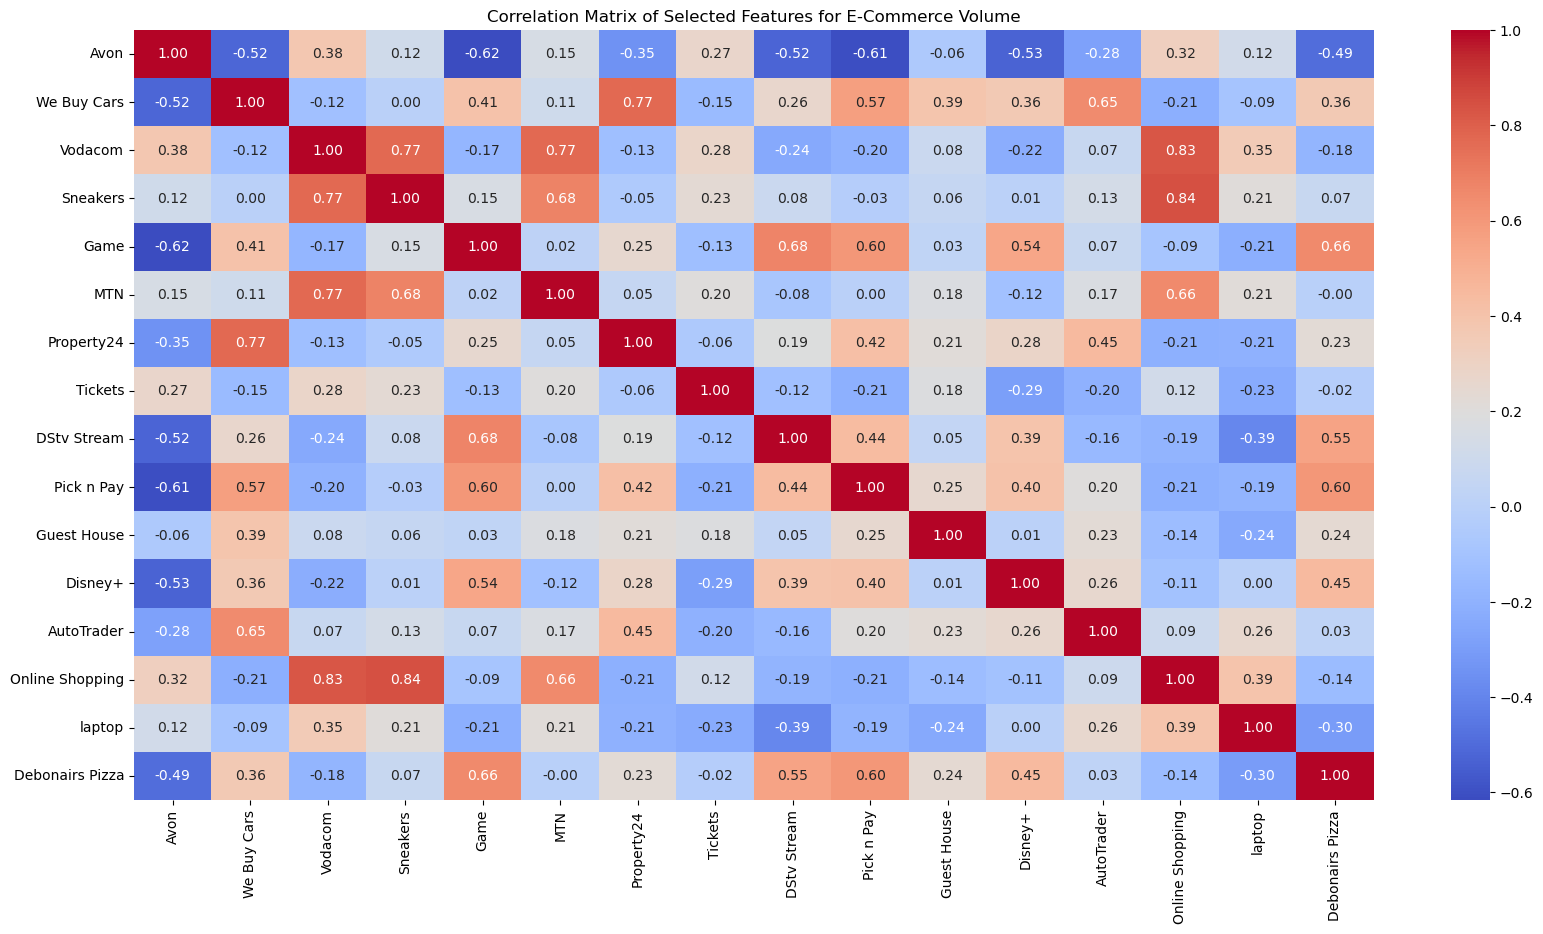

In [56]:
# Correlation of the selected features across the full dataset
volume_corr_matrix = Volume_selected.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(volume_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Selected Features for E-Commerce Volume")
plt.show()

In [57]:
# find highly correlated pairs 
threshold = 0.8
high_corr = np.where(volume_corr_matrix >= threshold)
high_corr_pairs = [(volume_corr_matrix.index[x], volume_corr_matrix.columns[y], volume_corr_matrix.iloc[x, y])
                   for x, y in zip(*high_corr) if x != y and x < y]

print(f"Highly correlated feature pairs (>= {threshold}):")
for f1, f2, corr_val in high_corr_pairs:
    print(f"{f1} - {f2}: {corr_val:.2f}")

Highly correlated feature pairs (>= 0.8):
Vodacom - Online Shopping: 0.83
Sneakers - Online Shopping: 0.84


In [58]:
# Decide which feature to drop using correlation to the target
# Compute correlation of features with target
feature_target_corr = Volume_selected.join(y.rename("E-Commerce Value")).corr()["E-Commerce Value"].drop("E-Commerce Value")

to_drop = set()
for f1, f2, corr_val in high_corr_pairs:
    if feature_target_corr[f1] >= feature_target_corr[f2]:
        to_drop.add(f2)
    else:
        to_drop.add(f1)

# Keep the reduced feature set
reduced_features = [f for f in Volume_selected.columns if f not in to_drop]
final_Volume = Volume_selected[reduced_features]

print("Dropped features:", to_drop)
print("Remaining features:", reduced_features)
print("Shape before:", Volume_selected.shape, " | after:", final_Volume.shape)

Dropped features: {'Sneakers', 'Online Shopping'}
Remaining features: ['Avon', 'We Buy Cars', 'Vodacom', 'Game', 'MTN', 'Property24', 'Tickets', 'DStv Stream', 'Pick n Pay', 'Guest House', 'Disney+', 'AutoTrader', 'laptop', 'Debonairs Pizza']
Shape before: (2365, 16)  | after: (2365, 14)


In [59]:
final_Volume.head()

,Avon,We Buy Cars,Vodacom,Game,MTN,Property24,Tickets,DStv Stream,Pick n Pay,Guest House,Disney+,AutoTrader,laptop,Debonairs Pizza
date,,,,,,,,,,,,,,
2018-12-30,34,7,46,11,29,23,19,0,8,37,39,17,34,11
2018-12-31,29,5,58,13,32,22,24,0,16,36,21,15,31,16
2019-01-01,39,9,54,13,29,30,16,0,11,27,36,20,30,29
2019-01-02,42,11,67,13,42,31,18,0,0,28,32,22,47,11
2019-01-03,45,13,65,12,35,34,18,0,7,25,23,23,38,7


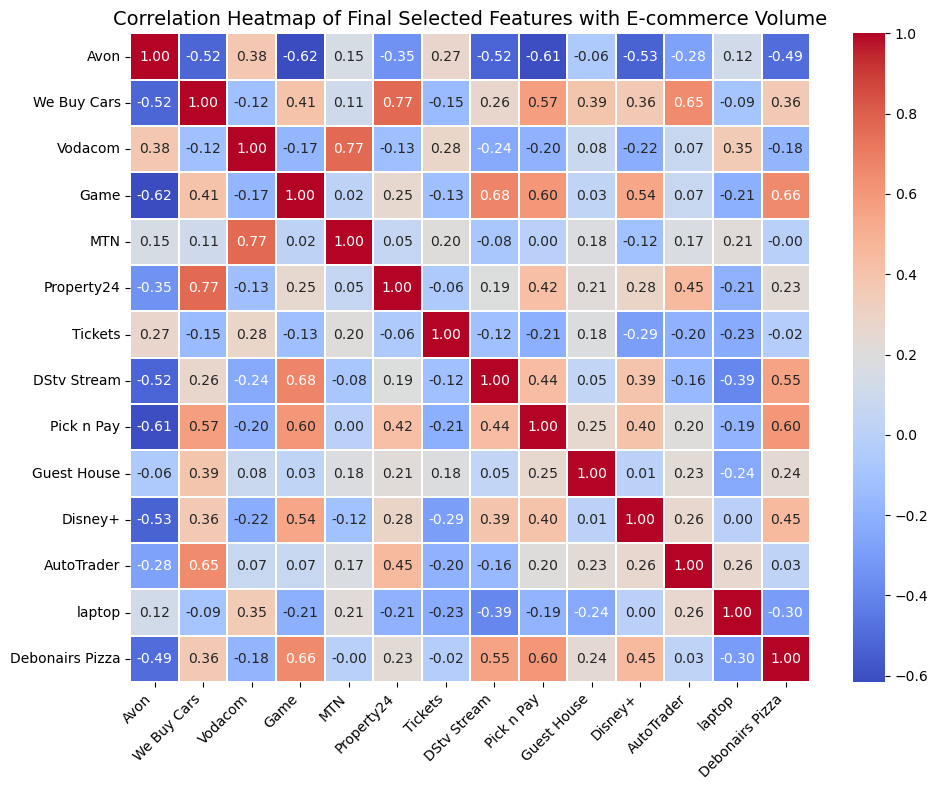

In [62]:
# Compute correlation matrix
corr_final = final_Volume.corr()

# --- Plot Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_final, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.3)
plt.title("Correlation Heatmap of Final Selected Features with E-commerce Volume", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [64]:
final_Volume.shape

(2365, 14)

In [60]:
# Save to CSV 
final_Volume.to_csv("selected_google_trends_volume.csv")

print("Saved selected features  to 'selected_google_trends_volume.csv'")
final_Volume.head()

Saved selected features  to 'selected_google_trends_volume.csv'


,Avon,We Buy Cars,Vodacom,Game,MTN,Property24,Tickets,DStv Stream,Pick n Pay,Guest House,Disney+,AutoTrader,laptop,Debonairs Pizza
date,,,,,,,,,,,,,,
2018-12-30,34,7,46,11,29,23,19,0,8,37,39,17,34,11
2018-12-31,29,5,58,13,32,22,24,0,16,36,21,15,31,16
2019-01-01,39,9,54,13,29,30,16,0,11,27,36,20,30,29
2019-01-02,42,11,67,13,42,31,18,0,0,28,32,22,47,11
2019-01-03,45,13,65,12,35,34,18,0,7,25,23,23,38,7
